# **Metropolis Monte Carlo: Esercizio 2 punto 3**

Implement a Metropolis MC loop to find the equilibrium configuration of a Ag cluster of fixed number of atoms 𝑁, randomly deposited on the flat ℎ 𝑥,𝑦 = 0 substrate. The energy of each configuration is evaluated by counting all bonds, (energies 𝐽0 and 𝐽1) formed by the 𝑁 atoms above the substrate. Each MC move consists in relocating one adatom at a randomly chosen site.

## *SVOLGIMENTO PUNTO 3*

Consider the MC loop at 𝑇 = 0 𝐾 and find the minimum-energy configuration of clusters from 𝑁 = 2 to 20. Check that in each case the global minimum is found by considering a long-enough MC loop and avoid metastable configurations by changing the random generator seed. Plot the energy of the minima 𝐸𝑚𝑖𝑛(𝑁) and the chemical potential 𝜇(𝑁) = 𝐸𝑚𝑖𝑛(𝑁)/𝑁. Analyze the results and interpret the alternating slope of 𝜇(𝑁) by considering the changes from one configuration to the next.

---

### 0) Importazioni e dati

In [1]:
import numpy as np
from CMS.MonteCarlo.MetropolisMonteCarlo import MetropolisMonteCarlo

In [2]:
temperature = 0   
L = (60,60) # dimensioni della griglia in unità di celle cristalline
N_atoms = np.arange(2, 21, 1) # numero di atomi da posizionare
seeds = [123413432, 4324234, 9876543, 5678901, 3456789, 8765432, 2345678,
        23, 4567890]

### 1) Simulazione

Da 2 atomi a 20\
Un solo seed, step=100_000: 20 secondi.\
9 seed diversi, step=300_000: 8minuti.

**ottimizzazioni**\
*mi aspetto velocizzazione del 20% (8min -> 6 e qualcosa)*\
- no copia matrice trial_height
- update dell'energia invece di ricalcolo completo
- occupied_sites ora è una list, non più matrice di bool\

9 seed diversi, step=300_000: 6minuti.

In [3]:
from CMS.MonteCarlo.ioMMC import XYZwriter

In [4]:
results_dict = {}
for seed in seeds:
    print(f"===== Simulazione con seed={seed} =====")
    for N in N_atoms:
        print(f"----- Simulazione con N={N} atomi -----")
        xyz_writer = XYZwriter(output_folder=f"output/Es2_3/seed={seed}/MMC~N={N}~T={temperature}/")
        simulazione = MetropolisMonteCarlo(
            L=L,
            N_atoms=N,
            T=temperature,
            xyz_writer=xyz_writer,
            seed=seed
        )
        result = simulazione.run(N_steps=300_000)
        if result.min_energy < results_dict[N].min_energy if N in results_dict else np.inf:
            results_dict[N] = result   

===== Simulazione con seed=123413432 =====
----- Simulazione con N=2 atomi -----
----- Simulazione con N=3 atomi -----
----- Simulazione con N=4 atomi -----
----- Simulazione con N=5 atomi -----
----- Simulazione con N=6 atomi -----
----- Simulazione con N=7 atomi -----
----- Simulazione con N=8 atomi -----
----- Simulazione con N=9 atomi -----
----- Simulazione con N=10 atomi -----
----- Simulazione con N=11 atomi -----
----- Simulazione con N=12 atomi -----
----- Simulazione con N=13 atomi -----
----- Simulazione con N=14 atomi -----
----- Simulazione con N=15 atomi -----
----- Simulazione con N=16 atomi -----
----- Simulazione con N=17 atomi -----
----- Simulazione con N=18 atomi -----
----- Simulazione con N=19 atomi -----
----- Simulazione con N=20 atomi -----
===== Simulazione con seed=4324234 =====
----- Simulazione con N=2 atomi -----
----- Simulazione con N=3 atomi -----
----- Simulazione con N=4 atomi -----
----- Simulazione con N=5 atomi -----
----- Simulazione con N=6 atomi

### 2) Analisi e plot

In [5]:
import matplotlib.pyplot as plt

#### Energia minima vs N

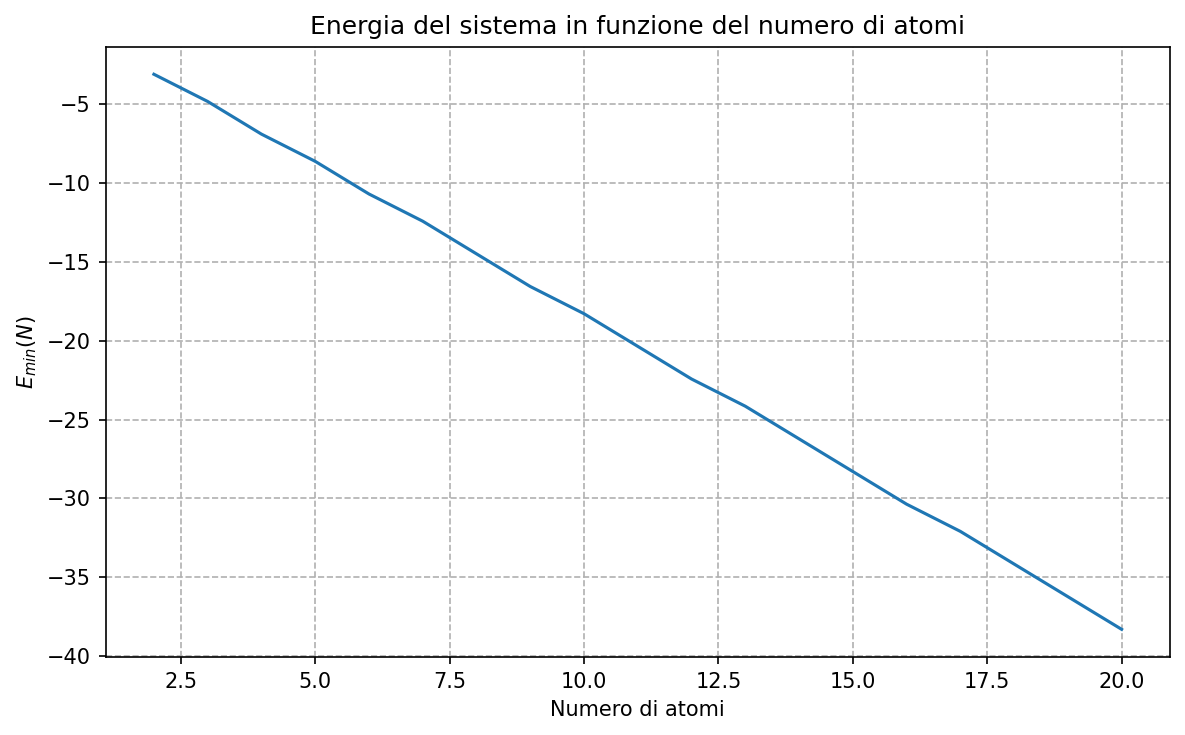

In [6]:
# plot energia minima v N
plt.figure(figsize=(8, 5), dpi=150)

x = N_atoms # da 2 atomi a 20
y = [results_dict[N].min_energy for N in N_atoms]

plt.plot(x, y)
plt.xlabel('Numero di atomi')
plt.ylabel(r'$E_{{min}}(N)$')
plt.title('Energia del sistema in funzione del numero di atomi')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

#### Potenziale chimico vs N

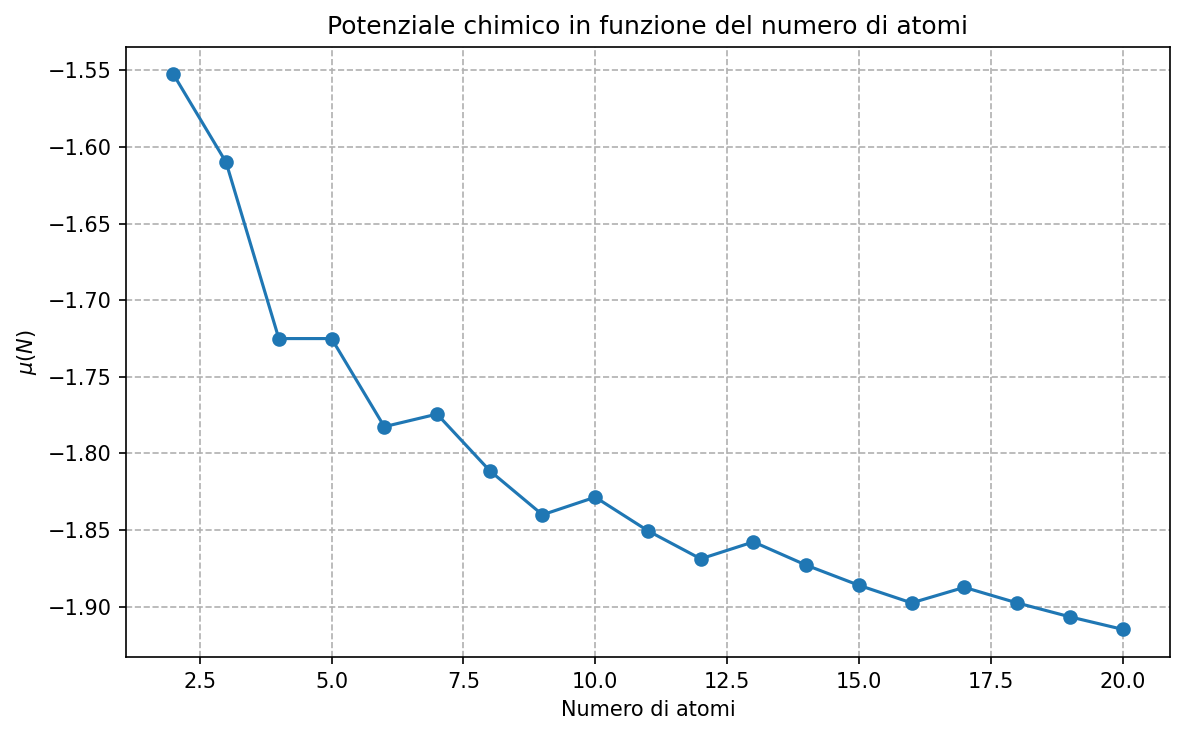

In [7]:
# plot energia/N v N
plt.figure(figsize=(8, 5), dpi=150)

x = N_atoms# da 2 atomi a 20
y = [results_dict[N].min_energy/N for N in N_atoms]

plt.plot(x, y, marker='o')
plt.xlabel('Numero di atomi')
plt.ylabel(r'$\mu(N)$')
plt.title('Potenziale chimico in funzione del numero di atomi')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()